1) Será necesario encontrar la distancia desde cada punto de la matriz X hasta el centro del clúster, y luego sumar estas distancias. Esto sería una implementación de la función de biblioteca **sklearn.metrics.pairwise.euclidean_distances**

In [45]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])


In [46]:
# Distancias desde cada punto hasta el centro del clúster
distances = np.linalg.norm(clust - centroid, axis=1)

In [47]:
total_distance = np.sum(distances)

In [48]:
print("Расстояние:", total_distance)

Расстояние: 11.440582444503534


2) Entrene el algoritmo k-promedios para el número de clústeres *n = 3* en el mismo DataSet que está contenido en el archivo clustering.pkl. Visualizar el resultado:

In [49]:
import pickle # El módulo pickle implementa un potente algoritmo para serializar y deserializar objetos Python.
import numpy as np

with open('7.10._clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

data_clustering

{'X': array([[ 0.87603609,  0.62413841],
        [-0.59721916, -0.59190989],
        [ 0.51495945, -0.30713853],
        [ 0.7034278 ,  0.28387307],
        [-1.58380208,  0.47433936],
        [-1.89264212, -1.27703905],
        [-1.02176144, -0.38446059],
        [-0.62827134, -2.30814935],
        [-0.71809158,  1.18055509],
        [ 1.3326625 ,  1.50041396],
        [-1.54314377, -1.41637914],
        [ 1.36973405,  0.08368168],
        [ 0.0221037 , -1.12794789],
        [-0.77765189, -0.41575325],
        [ 0.15878937,  0.79493996],
        [-1.20735773, -1.13085237],
        [-1.25958985, -0.44891921],
        [ 1.16168447, -0.22904005],
        [-0.83545665,  0.0704683 ],
        [ 2.08364608,  0.57341134],
        [ 1.33131197,  1.00815304],
        [ 0.76205687,  0.419355  ],
        [-0.77700391, -1.10004302],
        [-1.17619766, -0.11516798],
        [ 1.61888431, -0.81956962],
        [-1.26810263,  0.58652856],
        [ 1.04546445,  0.10600911],
        [ 0.78972191, -

In [50]:
X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

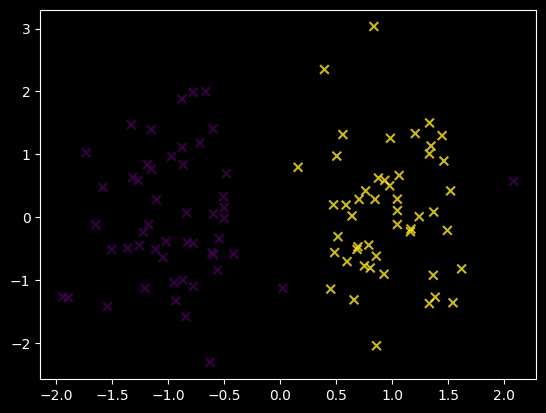

In [51]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, marker='x', alpha=0.8, label='data') # c=Y etiquetas de clúster
plt.show()

Dividimos los puntos en dos clústeres (parámetro n_clusters=3):

C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


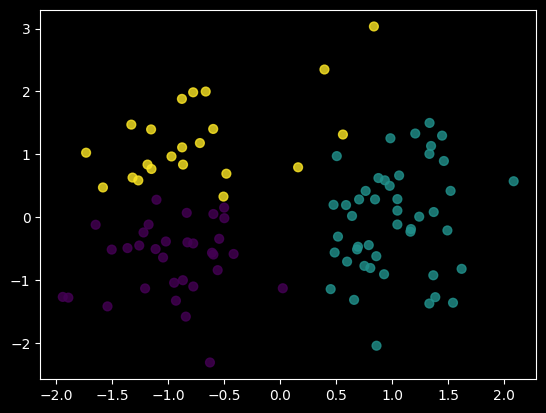

In [52]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X)

plt.scatter(X[:, 0], X[:, 1], s=40, c=kmeans_model.labels_, marker='o', alpha=0.8, label='data')
plt.show()

3) Realizar la agrupación mediante el método de K-medias utilizando la heurística de promediación de centroides. La agrupación debe realizarse **10 veces** para k = 2 con los parámetros del algoritmo:

kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [54]:
points = np.array(data_clustering['X'])

# Número de clústeres
k = 2

In [55]:
kmeans_model = KMeans(n_clusters=k, n_init=1, random_state=None, algorithm='full', max_iter=2)

C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages

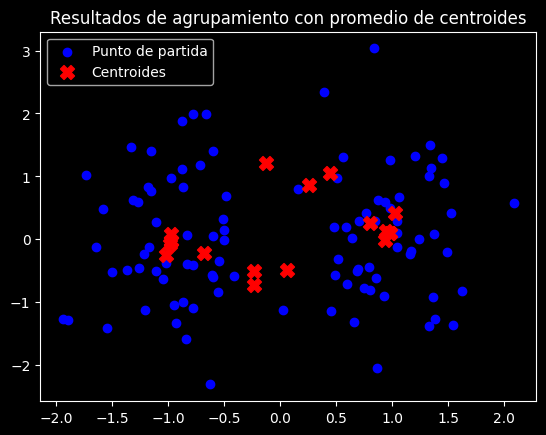

In [56]:
# Macizo para almacenar coordenadas centroides
c = []

# 10 ejecuciones del algoritmo
for _ in range(10):
    kmeans_model.fit(points)
    c.append(kmeans_model.cluster_centers_)

# Convertir a Macizo NumPy
c = np.array(c)

plt.scatter(points[:, 0], points[:, 1], c='blue', label='Punto de partida')
plt.scatter(c[:, :, 0], c[:, :, 1], c='red', marker='X', label='Centroides', s=100)
plt.title('Resultados de agrupamiento con promedio de centroides')
plt.legend()
plt.show()

In [57]:
import pandas as pd
data_clustering = pd.read_csv("datasets_de_casa/7.10_clustering_hw.csv", sep=',')

data_clustering

,x1,x2,y
0,6.221343,4.968753,2
1,7.360892,8.857455,2
2,-0.108178,4.730723,1
3,3.127358,1.927986,0
4,-0.817259,6.759974,1
...,...,...,...
295,0.863590,4.798039,1
296,4.451104,2.183275,0
297,7.530399,8.261081,2
298,0.103995,5.893627,1


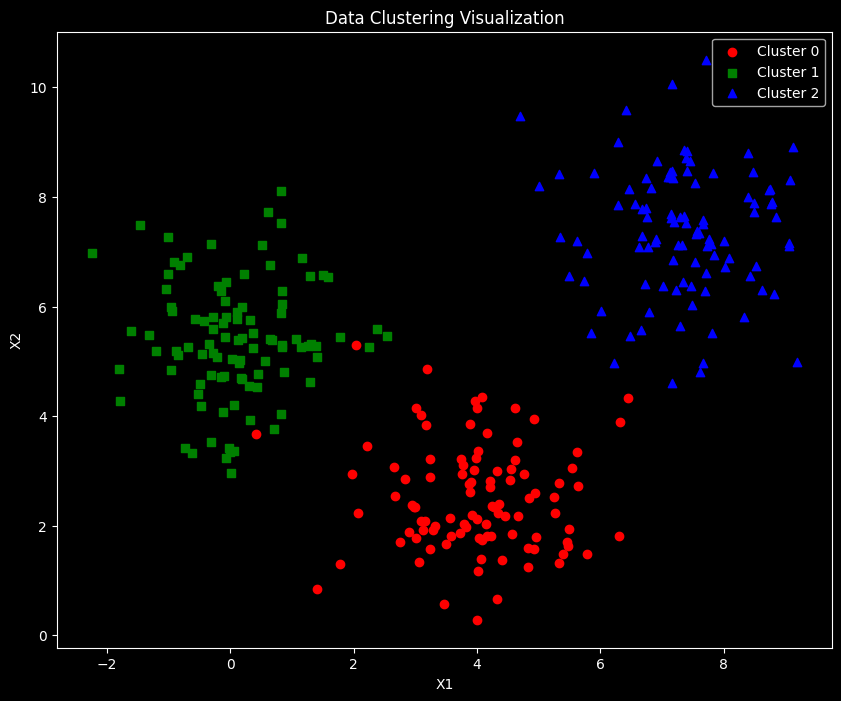

In [58]:
X1 = np.array(data_clustering['x1'])
X2 = np.array(data_clustering['x2'])
Y = np.array(data_clustering['y'])

cluster0 = data_clustering[data_clustering['y'] == 0]
cluster1 = data_clustering[data_clustering['y'] == 1]
cluster2 = data_clustering[data_clustering['y'] == 2]

plt.figure(figsize=(10, 8))
plt.scatter(cluster0['x1'], cluster0['x2'], c='r', marker='o', label='Cluster 0')
plt.scatter(cluster1['x1'], cluster1['x2'], c='g', marker='s', label='Cluster 1')
plt.scatter(cluster2['x1'], cluster2['x2'], c='b', marker='^', label='Cluster 2')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Clustering Visualization')

plt.legend()
plt.show()


1) calcular el número óptimo de clústeres k

C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

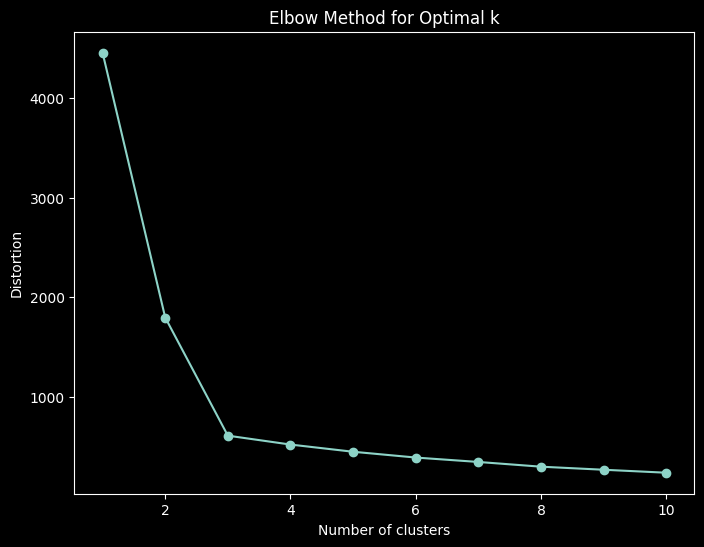

In [59]:
# Extracción de características
X = data_clustering[['x1', 'x2']]

# Cálculo de la distancia media a los centroides para diferentes números de grupos
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

codo óptimo - 3

2) entrenaré K-means con el número de clústeres k

C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


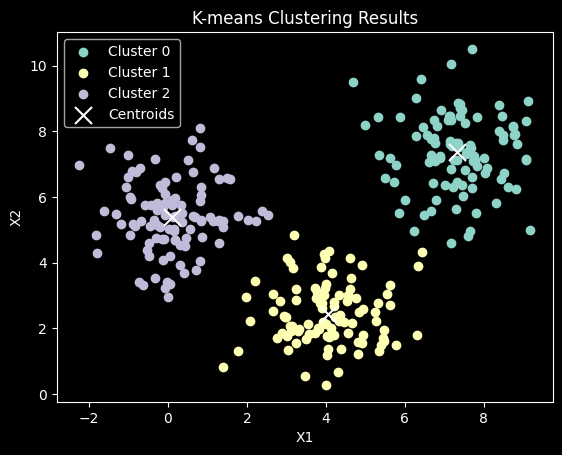

In [60]:
from sklearn.cluster import KMeans

X = data_clustering[['x1', 'x2']]

k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

data_clustering['predicted_cluster'] = kmeans.labels_

for cluster_label in range(k):
    cluster_data = data_clustering[data_clustering['predicted_cluster'] == cluster_label]
    plt.scatter(cluster_data['x1'], cluster_data['x2'], label=f'Cluster {cluster_label}')

# Отметка центроидов
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=150, c='white', label='Centroids')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()


3) ¿a qué grupo pertenece el punto x=(5,8) ? ¿a qué grupo pertenece el punto x=(0,5) ? ¿Pertenecen a diferentes grupos o uno?

In [61]:
punto1 = np.array([[5, 8]])
punto2 = np.array([[0, 5]])

# Determinar el clúster para el punto (5, 8)
etiqueta_cluster_punto1 = kmeans.predict(punto1)

# Determinar el clúster para el punto (0, 5)
etiqueta_cluster_punto2 = kmeans.predict(punto2)

print(f"El punto (5, 8) pertenece al clúster: {etiqueta_cluster_punto1[0]}")
print(f"El punto (0, 5) pertenece al clúster: {etiqueta_cluster_punto2[0]}")


El punto (5, 8) pertenece al clúster: 0
El punto (0, 5) pertenece al clúster: 2


C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


4) ¿Cuál es la calidad de la agrupación por AMI?

In [62]:
from sklearn.metrics import adjusted_mutual_info_score

# Supongamos que 'Y' es la verdadera asignación de clústeres y 'predicted_labels' son las etiquetas predichas por K-means
true_labels = Y
predicted_labels = kmeans.labels_

# Calcular el AMI
ami_score = adjusted_mutual_info_score(true_labels, predicted_labels)

print(f"El Adjusted Mutual Information Score es: {ami_score}")

El Adjusted Mutual Information Score es: 0.9700074953683859


**casi 1, muy buen resultado!**